 CHAPTER 3 FROM THE BOOK :https://r4ds.had.co.nz/

In [2]:
import pandas as pd
from plotnine import *
import seaborn as sns

In [3]:
# We are going to investigate diamonds
from plotnine.data import diamonds
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


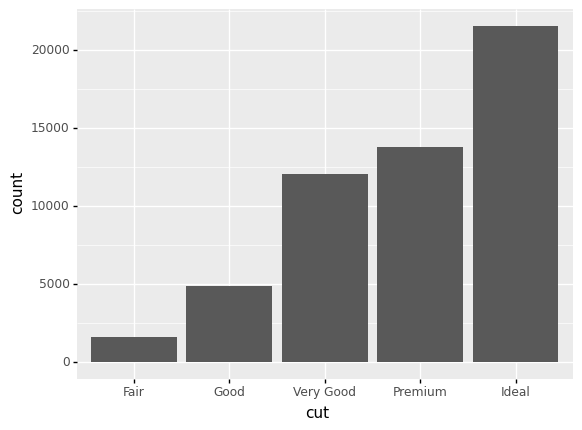

<ggplot: (114558791126)>

In [4]:
# Create a bar chart based on the 'cut'
ggplot(data=diamonds) + \
    geom_bar(mapping=aes(x='cut'))

We can see that geom_bar measures the observations in each catergory
Hence we can also use stat_count() to observe the same output

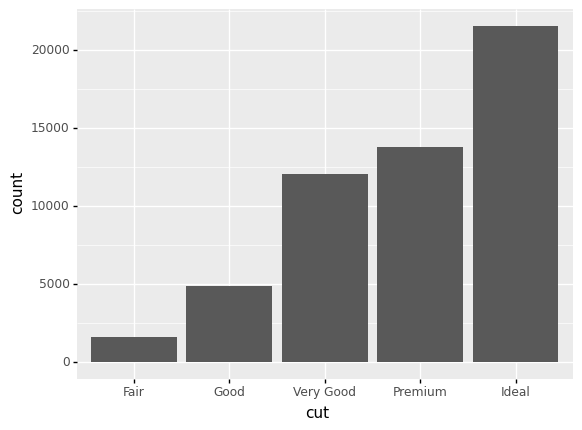

<ggplot: (114559418585)>

In [5]:
# Stat_count()
ggplot(data=diamonds) + \
    stat_count(mapping=aes(x='cut'))

<AxesSubplot:xlabel='cut', ylabel='count'>

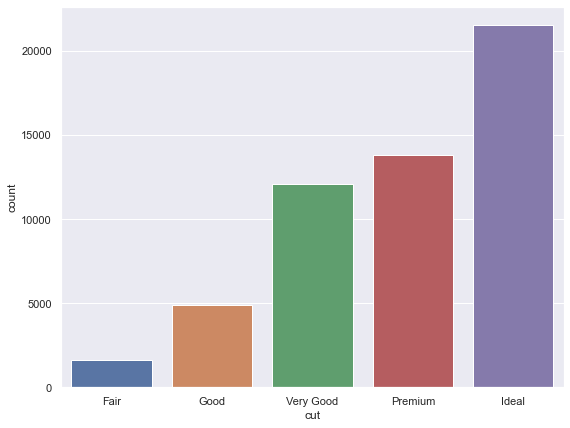

In [6]:
# Seaborn Alternative
sns.set_style('dark')
sns.set(rc={'figure.figsize':(9, 7)})
sns.countplot(x='cut', data=diamonds)

Sometimes our data come already counted and in columns

In [7]:
# Hence we can use a groupby
counted = diamonds.groupby('cut').size().to_frame(name='freq').reset_index()
counted

,cut,freq
0,Fair,1610
1,Good,4906
2,Very Good,12082
3,Premium,13791
4,Ideal,21551


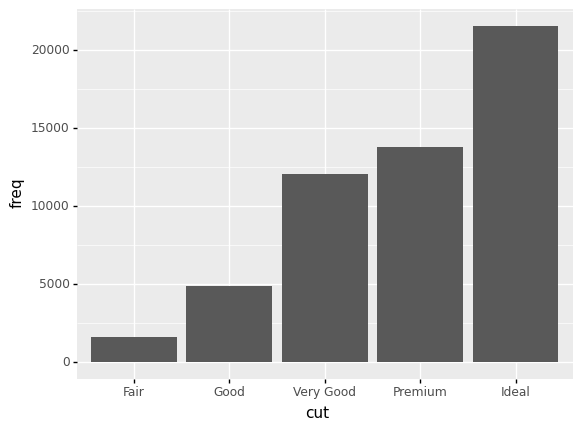

<ggplot: (114559367352)>

In [8]:
# Use data in the form found above we need stat
ggplot(data=counted) + \
    geom_bar(mapping=aes(x='cut', y='freq'), stat="identity") # stat assigned to identity

<AxesSubplot:xlabel='cut', ylabel='freq'>

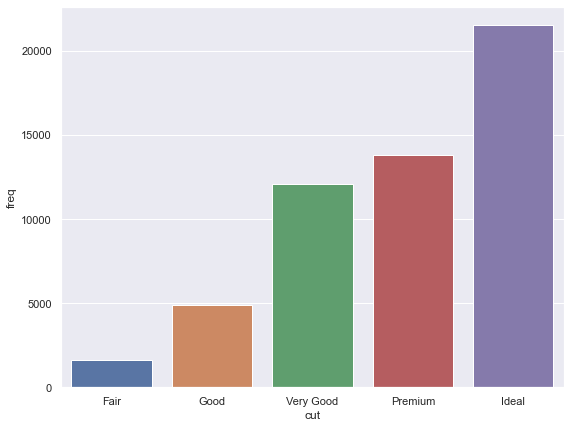

In [9]:
# Seaborn Alternative
sns.barplot(x='cut', y='freq', data=counted)

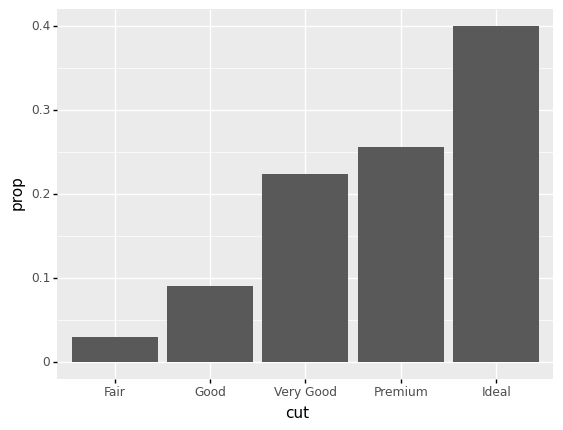

<ggplot: (114559480598)>

In [11]:
# If we want percentages instead
ggplot(data=diamonds) + \
    geom_bar(mapping=aes(x='cut', y="stat(prop)", group=1)) # stat(prop) and we also need to set group=1

Note:

In ggpolot2 we can also design any statistical graph measurement by stat_summary() depending on the parameters we set

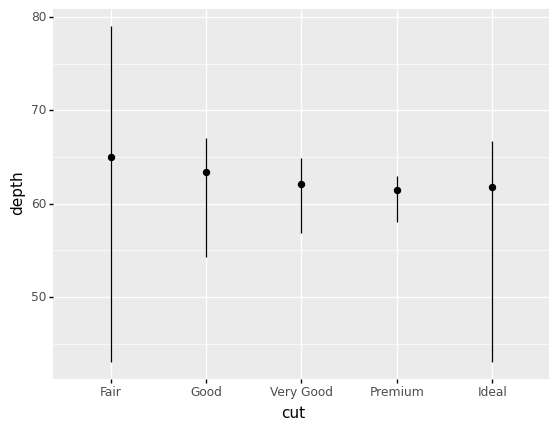

<ggplot: (114560626707)>

In [13]:
# Example
import numpy as np

ggplot(data = diamonds) + \
    stat_summary(mapping=aes(x='cut', y='depth'),
        fun_ymin=np.min, fun_ymax=np.max, fun_y=np.median)

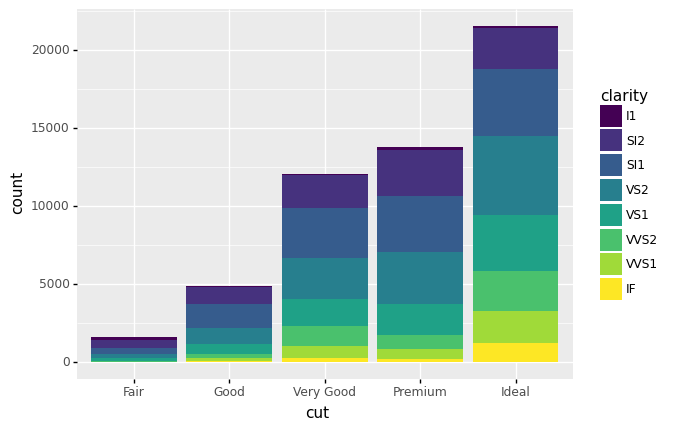

<ggplot: (114559513522)>

In [12]:
# Another charecteristic of diamonds its there clarity
ggplot(data=diamonds) +  \
    geom_bar(mapping = aes(x='cut', fill='clarity'))

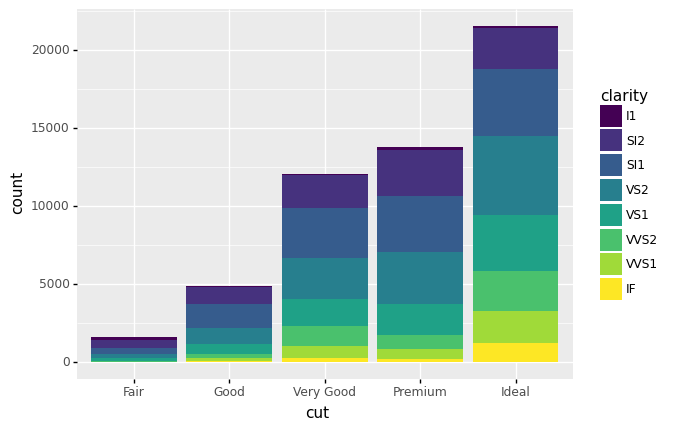

<ggplot: (114560669540)>

In [14]:
# We get the same result by using
ggplot(data=diamonds) +  \
    geom_bar(mapping = aes(x='cut', fill='clarity'), position='stack') # stack the bars

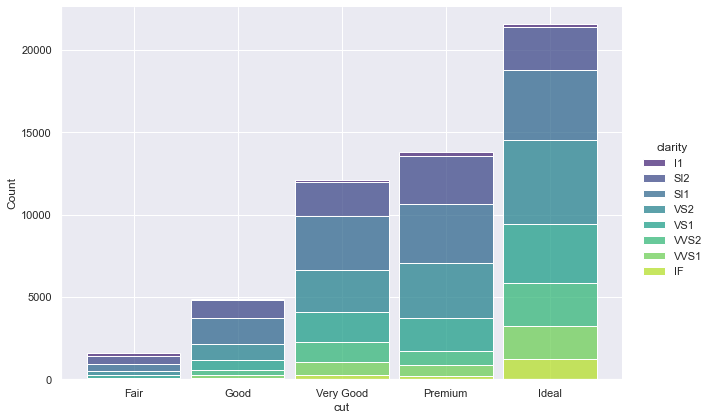

In [15]:
# Seaborn alternative
sns.displot(x='cut', hue='clarity',multiple='stack',
            height=6,aspect=1.5,shrink=0.9,
            palette='viridis',
            data=diamonds)

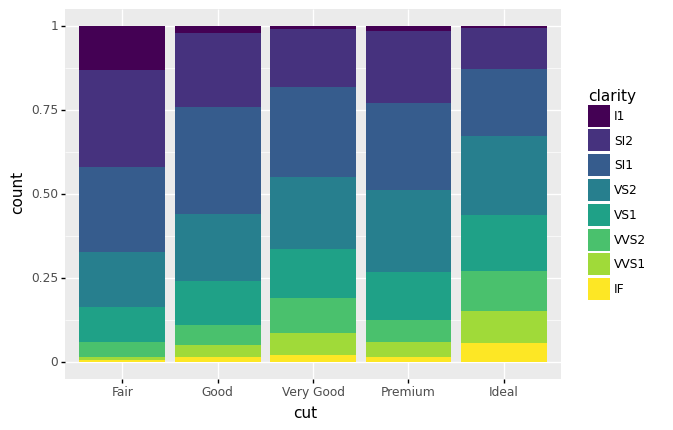

<ggplot: (114560814267)>

In [16]:
# We can also use position='fill'
ggplot(data=diamonds) + \
    geom_bar(mapping=aes(x='cut', fill='clarity'), position='fill')

But by doing such we can see from the above graph that all the individual bars sum upto 1

Hence we cannnot clearly distinguish their differences

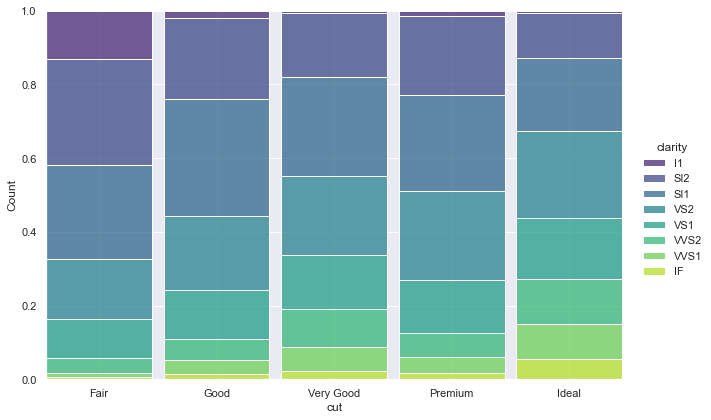

In [18]:
# Seaborn alternative
sns.displot(x='cut', hue='clarity',multiple='fill',
            height=6,aspect=1.5,shrink=0.9,
            palette='viridis',
            data=diamonds)

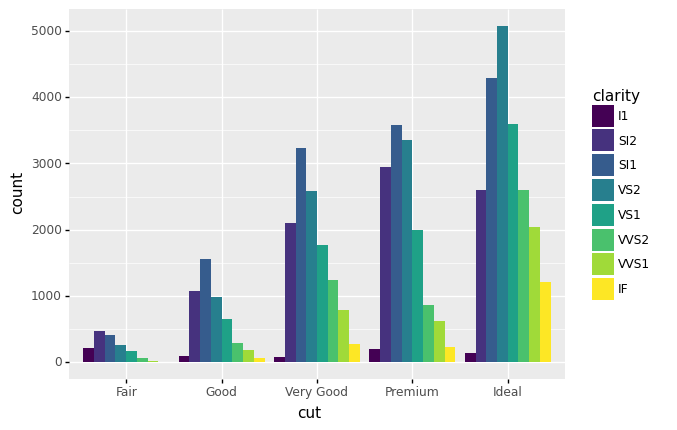

<ggplot: (114561202264)>

In [17]:
# If we want the bars to be side to side
ggplot(data=diamonds) + \
    geom_bar(mapping=aes(x='cut', fill='clarity'), position='dodge')

<AxesSubplot:xlabel='cut', ylabel='count'>

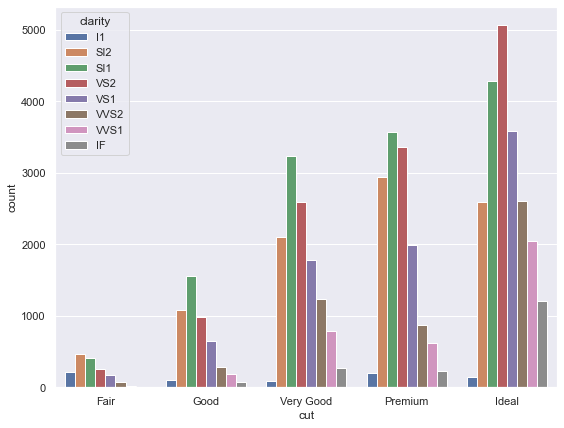

In [19]:
# Seaborn alternative
sns.countplot(x='cut', hue='clarity', data=diamonds)

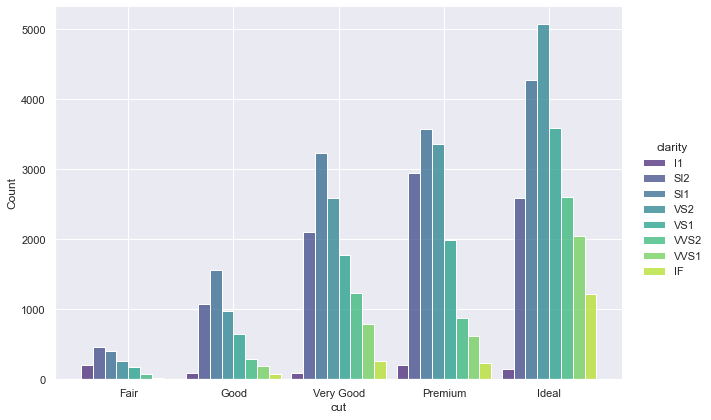

In [20]:
# Seaborn alternative
sns.displot(x='cut', hue='clarity',multiple='dodge',
            height=6,aspect=1.5,shrink=0.9,
            palette='viridis',
            data=diamonds)

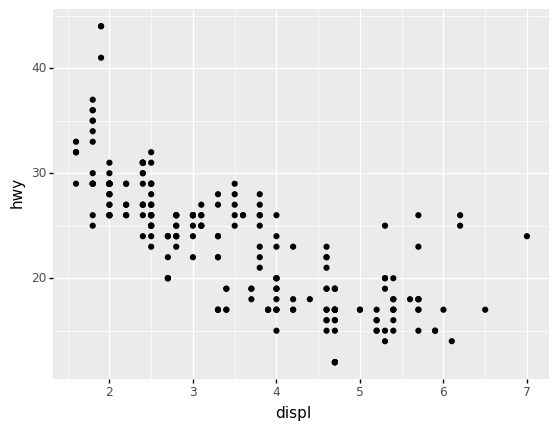

<ggplot: (114561729238)>

In [21]:
# Lets go back to part 1 data - car related
from plotnine.data import mpg

ggplot(data = mpg) + \
    geom_point(mapping=aes(x='displ', y='hwy'))

To avoid the points to be on top of each other we can use position='jitter'

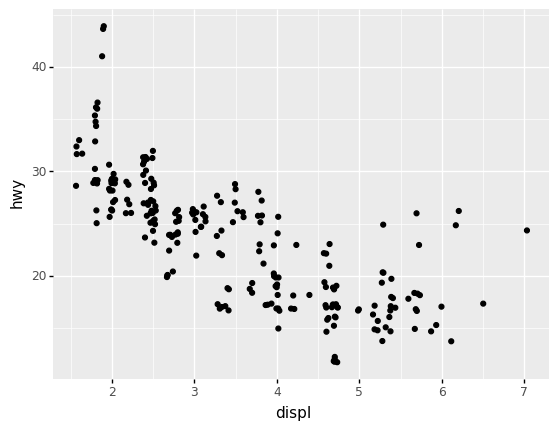

<ggplot: (114562059680)>

In [22]:
ggplot(data = mpg) + \
    geom_point(mapping=aes(x='displ', y='hwy'), position='jitter') # small change in distance between point but not affecting data

In [23]:
usecols = [
    'model',
    'make',
    'year', 
    'cylinders',
    'drive',
    'trany',
    'displ',
    'highway08',
    'city08',
    'fuelType',
    'VClass'
]

fmpg = pd.read_csv('vehicles.csv.zip', usecols=usecols)

In [24]:
fmpg

,city08,cylinders,displ,drive,fuelType,highway08,make,model,trany,VClass,year
0,19,4.0,2.0,Rear-Wheel Drive,Regular,25,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,1985
1,9,12.0,4.9,Rear-Wheel Drive,Regular,14,Ferrari,Testarossa,Manual 5-spd,Two Seaters,1985
2,23,4.0,2.2,Front-Wheel Drive,Regular,33,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985
3,10,8.0,5.2,Rear-Wheel Drive,Regular,12,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,1985
4,17,4.0,2.2,4-Wheel or All-Wheel Drive,Premium,23,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993
...,...,...,...,...,...,...,...,...,...,...,...
44682,19,4.0,2.2,Front-Wheel Drive,Regular,26,Subaru,Legacy,Automatic 4-spd,Compact Cars,1993
44683,20,4.0,2.2,Front-Wheel Drive,Regular,28,Subaru,Legacy,Manual 5-spd,Compact Cars,1993
44684,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Automatic 4-spd,Compact Cars,1993
44685,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Manual 5-spd,Compact Cars,1993


In [25]:
# Renaming the columns
fmpg.rename(columns={
        'highway08': 'hwy', 
        'city08': 'city',
        'fuelType': 'fl',
        'VClass': 'class',
        'trany': 'trans',
        'cylinders': 'cyl',
        'drive': 'drv'
    }, inplace=True)
fmpg

,city,cyl,displ,drv,fl,hwy,make,model,trans,class,year
0,19,4.0,2.0,Rear-Wheel Drive,Regular,25,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,1985
1,9,12.0,4.9,Rear-Wheel Drive,Regular,14,Ferrari,Testarossa,Manual 5-spd,Two Seaters,1985
2,23,4.0,2.2,Front-Wheel Drive,Regular,33,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985
3,10,8.0,5.2,Rear-Wheel Drive,Regular,12,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,1985
4,17,4.0,2.2,4-Wheel or All-Wheel Drive,Premium,23,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993
...,...,...,...,...,...,...,...,...,...,...,...
44682,19,4.0,2.2,Front-Wheel Drive,Regular,26,Subaru,Legacy,Automatic 4-spd,Compact Cars,1993
44683,20,4.0,2.2,Front-Wheel Drive,Regular,28,Subaru,Legacy,Manual 5-spd,Compact Cars,1993
44684,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Automatic 4-spd,Compact Cars,1993
44685,18,4.0,2.2,4-Wheel or All-Wheel Drive,Regular,24,Subaru,Legacy AWD,Manual 5-spd,Compact Cars,1993


In [26]:
# Combining the class
fmpg.loc[fmpg['class'].str.startswith('Small Pickup Trucks'), 'class'] = 'Small Pickup Trucks'
fmpg.loc[fmpg['class'].str.startswith('Standard Pickup Trucks'), 'class'] = 'Standard Pickup Trucks'
fmpg.loc[fmpg['class'].str.startswith('Special Purpose Vehicle'), 'class'] = 'Special Purpose Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Sport Utility Vehicle'), 'class'] = 'Sport Utility Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Small Sport Utility Vehicle'), 'class'] = 'Small Sport Utility Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Standard Sport Utility Vehicle'), 'class'] = 'Standard Sport Utility Vehicle'
fmpg.loc[fmpg['class'].str.startswith('Minivan'), 'class'] = 'Minivan'
fmpg.loc[fmpg['class'].str.startswith('Vans'), 'class'] = 'Vans'

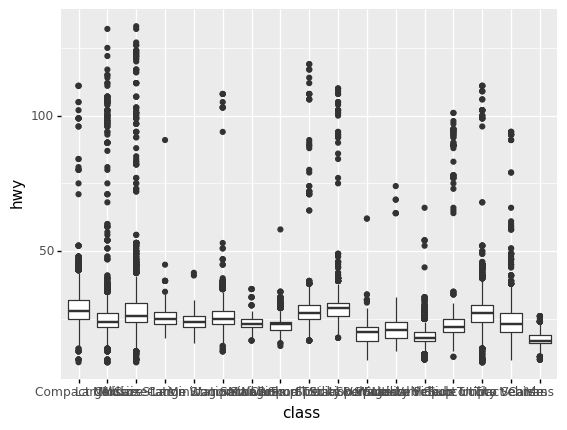

<ggplot: (114562578514)>

In [27]:
# Creating box-plots
ggplot(data=fmpg, mapping=aes(x='class', y='hwy')) + \
    geom_boxplot()

<AxesSubplot:xlabel='class', ylabel='hwy'>

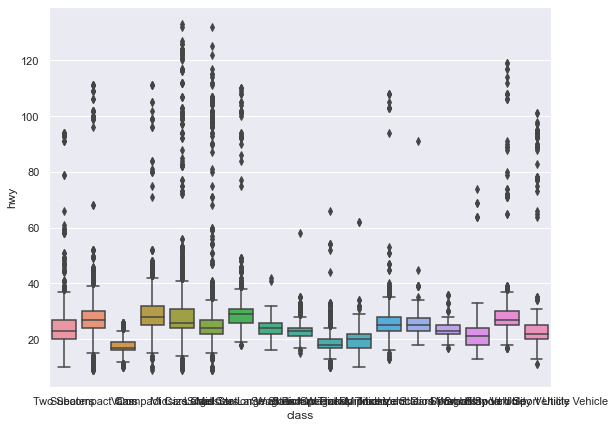

In [28]:
# Seaborn alternative
sns.boxplot(x="class", y="hwy", data=fmpg)

As we can see from the above graphs , the horizontal axis is unreadable, because the class of each one is written ontop of each other


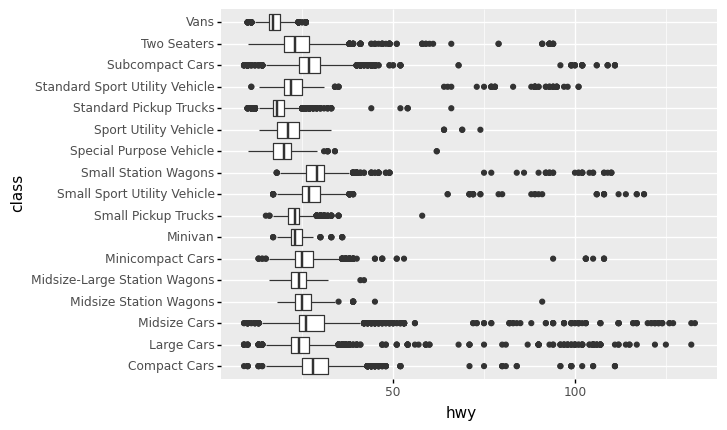

<ggplot: (114562488333)>

In [29]:
# Solving this issue by flipping the graph
ggplot(data=fmpg, mapping=aes(x='class', y='hwy')) + \
    geom_boxplot() + \
    coord_flip()

<AxesSubplot:xlabel='hwy', ylabel='class'>

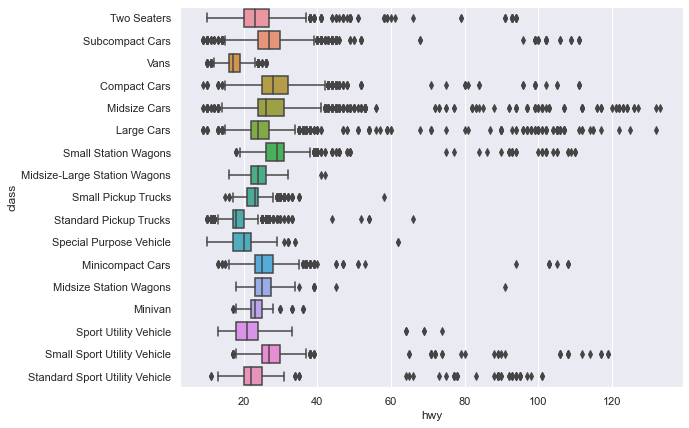

In [31]:
# Seaborn alternative
sns.boxplot(x="hwy", y="class", orient = 'h',data=fmpg)